# Лабораторная работа №2

Вариант 24

Выполнила студентка группы 15-АС Соршнева Марина

In [43]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('datatraining.csv', sep = ',')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

Представлены наборы данных для обучения и тестирования

date: дата (год - месяц - день - час : минута : секунда)

Temperature: температура (по Цельсию)

Humidity: относительная влажность (в процентах)

Light: освещенность (в люксах)

CO2: углекислый газ (в ppm)

HumidityRatio: коэфицент влажности (производная от температуры и относительной влажности приходящихся на 1 кг водянного пара / воздуха)

Occupancy: занятность (0 - незанятый статус, 1 - занятый статус)

Источник данных: Luis Candanedo, luismiguel.candanedoibarra '@' umons.ac.be, UMONS.

#### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [22]:
print("До:", data.shape)

До: (8143, 7)


In [23]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)
print("После:", data.shape)

После: (8143, 7)


#### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

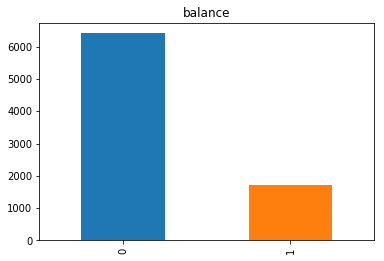

In [45]:
data['Occupancy'].value_counts().plot(kind = "bar", title = "balance")
plt.show()

Мы видим, что данные по классам не сбалансированны.
Будем использовать ROC-кривую, поскольку она дает адекватную оценку качества работы алгоритма, где классы несбалансированы.

#### 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [38]:
# количественные признаки
quantitative_columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
data = data[quantitative_columns]
sns.boxplot(data = data)

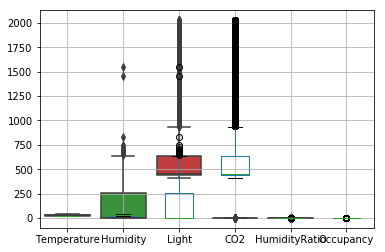

In [26]:
data.boxplot()
plt.show()

В качестве способа масштабирования выберем метод нормализации

In [40]:
x = data[quantitative_columns].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataCopy = pd.DataFrame(x_scaled, columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])
dataCopy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1.000000,0.470533,0.275490,0.190933,0.557318,1.0
1,0.992823,0.470332,0.277754,0.186446,0.554807,1.0
2,0.992823,0.469326,0.275490,0.186136,0.553761,1.0
3,0.992823,0.467315,0.275490,0.182887,0.551669,1.0
4,0.980861,0.467315,0.275490,0.180566,0.547851,1.0


In [46]:
sns.boxplot(data = dataCopy)

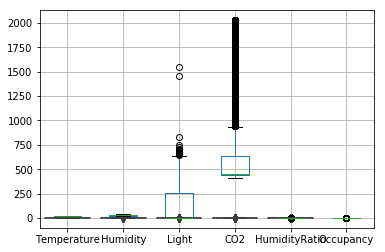

In [47]:
data.boxplot()
plt.show()

#### 5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

Замена не требуется, так как категориальные признаки отсутсвуют.

#### 6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации).

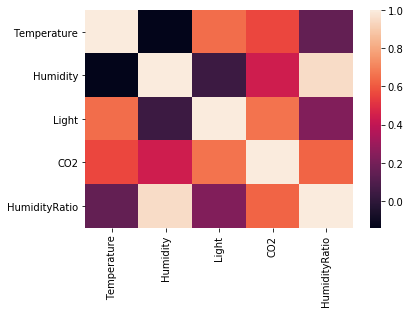

In [50]:
import seaborn as sns
corr = data.drop('Occupancy', axis=1).corr()
sns.heatmap(corr);
plt.show()

In [51]:
corr

,Temperature,Humidity,Light,CO2,HumidityRatio
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198
Light,0.649942,0.037828,1.000000,0.664022,0.230420
CO2,0.559894,0.439023,0.664022,1.000000,0.626556
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000


#### 7.Заполните пропущенные значения в данных.

In [52]:
data.shape

(8143, 7)

In [53]:
data.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

Мы видим, что пропущенных значений в данных нет.

#### 8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

* 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
* 3 – линейный классификатор (персептрон);

In [54]:
# разделим полученные данные на данные для обучения и теста
from sklearn.model_selection import train_test_split
import numpy as np
dataCopyOccupancy = dataCopy['Occupancy']
dataCopy = dataCopy.drop('Occupancy', axis=1)
X, Y = dataCopy, dataCopyOccupancy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 211)
print(X_train.shape)
print(X_test.shape)

(5292, 5)
(2851, 5)


#### K ближайших соседей (радиус)

In [55]:
# найдем оптимальный радиус для классификатора ближайших соседей
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.grid_search import GridSearchCV
rnc = RadiusNeighborsClassifier(outlier_label=1.0)

params = {'radius': np.arange(0.0, 5.0, 0.25)}

gridSearch = GridSearchCV(rnc, params)
gridSearch.fit(X_train, Y_train)

chose_radius = gridSearch.best_estimator_.radius
chose_score = gridSearch.best_score_
print('best train score:', chose_score, ' at radius:', chose_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1.0, radius=chose_radius)
rnc.fit(X_train, Y_train)
score  = np.mean(Y_test  == rnc.predict(X_test))
print('test score: ', score)

best train score: 0.9856386999244142  at radius: 0.25
test score:  0.98456681866


#### Линейный классификатор (персептрон)

In [58]:
slf = sk.linear_model.Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,2,20)[1:],n_iter=[int(50)]), n_jobs=int(10))
paramsearch.fit(X_train, Y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
print('best score=',best_score,'at alpha',selected_alpha)
best_n_iter = paramsearch.best_estimator_.n_iter
best_n_jobs = paramsearch.best_estimator_.n_jobs

dtc = sk.linear_model.Perceptron(alpha=selected_alpha,n_iter=best_n_iter,n_jobs=best_n_jobs)
dtc.fit(X_train, Y_train)
test_score  = np.mean(Y_test == dtc.predict(X_test))
print('test score: ', test_score)

best score= 0.9856386999244142 at alpha 0.105263157895
test score:  0.985268326903


In [60]:
class CustomClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, Y_train):
        '''
        Общее описание.
         Определяет вероятность того, что тестовый экземпляр соответствует классу.
        
         Алгоритм.
         Мы пройдем нулевой радиус до радиуса двойного классификатора
         с элементарным шагом (dr). Если экземпляр находится вдоль:
         * Zero raduis + dr - соответствует 100%
         * Классификатор raduis + dr - соответствует 50%
         * Двойной классификатор raduis + dr и за его пределами - соответствует 0%
         Имеются промежуточные значения процентов. Каждый шаг соответствует своему
         собственному процентному(от всей величины) значению. Если предсказанный экземпляр меняет
         класс, этот экземпляр принадлежит текущему радиусу.
        
        '''
        runs = 25
        dr = (2*self.radius/runs)
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(Y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, Y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, Y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

In [24]:
from sklearn.linear_model import Perceptron
slf = Perceptron()
#найдем оптимальные параметры для классификатора
#alfa - Константа, которая умножает член регуляризации
#max_iter - Максимальное количество проходов над данными обучения (иначе говоря, эпохи)
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(x_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score,'| alpha:',selected_alpha, '| max_iter:', selected_max_iter)

#создаем модель персептрона по нашим оптимальным данным
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
#тренируем ее
perceptron.fit(x_train, y_train)
#смотрим в каком проценте случаев классификатор дает верный результат
test_score  = np.mean(y_test == perceptron.predict(x_test))
print('test score: ', test_score)

best score: 0.9794915878668795 | alpha: 0.0526315789474 | max_iter: 5
test score:  0.941960623462


Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

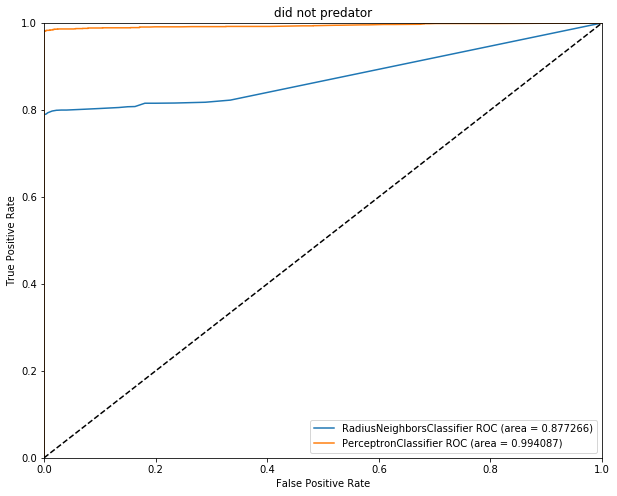

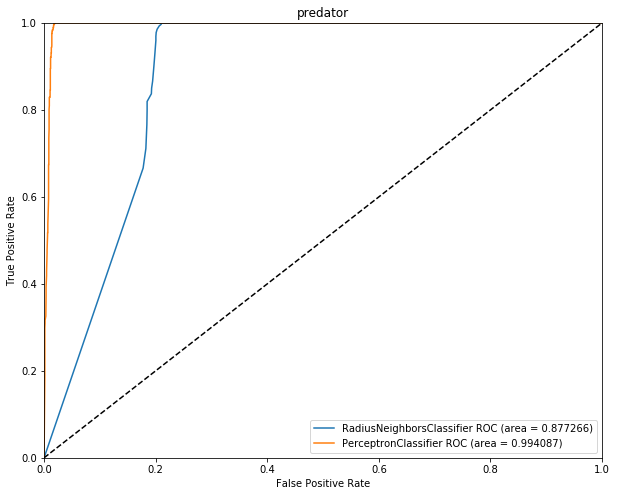

In [62]:
clf_isotonic = CalibratedClassifierCV(slf, cv=10, method='isotonic')
clf_isotonic.fit(X_train, Y_train)
probas_slf0 = clf_isotonic.predict_proba(X_test)
clf_isotonic.fit(X_train, Y_train)
probas_slf1 = clf_isotonic.predict_proba(X_test)

#ROC графики
plt.figure(figsize=(10,8))
# K соседей
mrnc = CustomClassifier(outlier_label=1, radius=chose_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, Y_train)
tpr, fpr, thresholds = roc_curve(Y_test, probas_mrnc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Персептрон
tpr, fpr, thresholds = roc_curve(Y_test, probas_slf0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('did not predator')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, Y_train)
fpr, tpr, thresholds = roc_curve(Y_test, probas_mrnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))
# Персептрон
fpr, tpr, thresholds = roc_curve(Y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('predator')
plt.show()

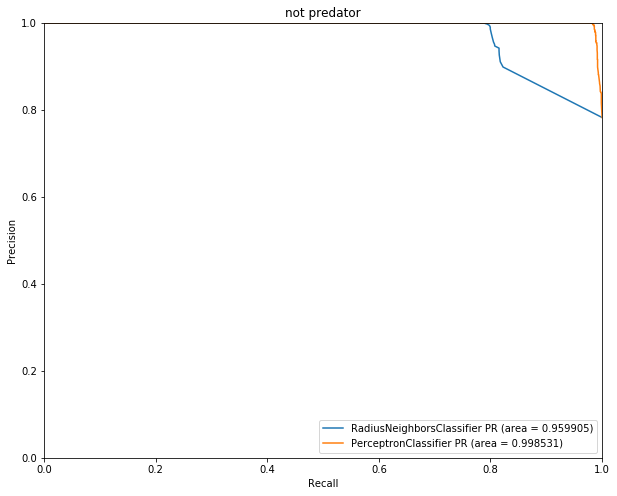

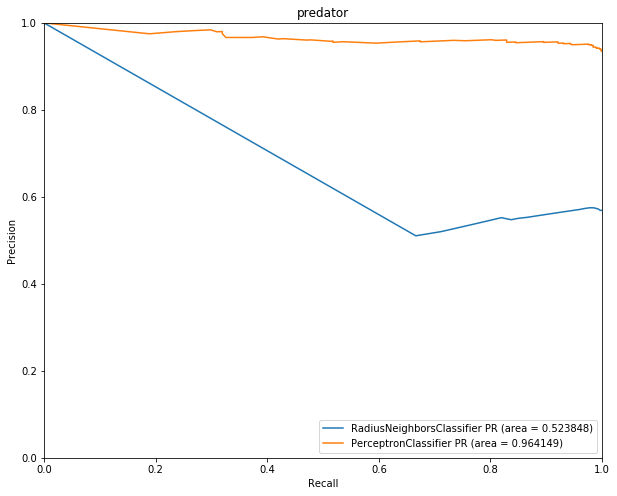

In [63]:
#PR графики
plt.figure(figsize=(10,8))
Y_test_invers = []
for i, y in enumerate(Y_test.reset_index(drop=True)):
    Y_test_invers.append(1-y)
# K соседей
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, Y_train)
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_mrnc1[:,0])
aps_mrnc1 = average_precision_score(Y_test_invers,probas_mrnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1))
# Персептрон
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_slf1[:,0])
aps_slf1 = average_precision_score(Y_test_invers,probas_slf1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1))
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not predator')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(Y_test, probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(Y_test,probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1))
# Персептрон
precision, recall, thresholds = precision_recall_curve(Y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(Y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('predator')
plt.show()


#### 9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Данные классификаторы решают задачу классификации с вероятностью 0.76~0.8, что является хорошим результатом, т.к. классов всего 2. Персептрон дает лучший результат, благодаря хорошо подобранным параметрам и многослойной сетке. Поэтому задача классификации была решена корректно